# Simple prediction of XTB stock price using LR and DTR

With more than 15 years experience, XTB is one of the largest stock exchange-listed FX & CFD brokers in the world. It has offices in over 13 countries including UK, Poland, Germany, France and Chile. 

According to the company financial reports, its main profits come from FX, comodities, and CFD contracts. So, the more volatility on the global financial market, the better for the profits. Keeping that in mind, I choose some key fundamental indicators (indices) or possible underlying products (USD/EUR, gold, oil). That seems to be the most promising for my analysis. What is essential due to the different timezones is that some of them can be treated as leading indicators, which is beneficial for the practical application of such research.

- X-Trade Brokers SA (XTB)
- WIG (WIG)\-S&P 500 
- U.S. (^SPX)
- S&P 500 VIX Nov 2020 (VIX20.F)
- U.S. Dollar / Euro 1:1 (USDEUR)
- Gold - COMEX (GC.F)
- Crude Oil WTI - NYMEX (CL.F)

In [2]:
# Importing key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("bmh")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error, r2_score

In [3]:
# Downloading data
xtb = pd.read_csv("Data/xtb_d.csv", index_col="Data", parse_dates=True)
wig = pd.read_csv("Data/wig_d.csv", index_col="Data", parse_dates=True)
spx = pd.read_csv("Data/spx_d.csv", index_col="Data", parse_dates=True)
gld = pd.read_csv("Data/gc_f_d.csv", index_col="Data", parse_dates=True)
oil = pd.read_csv("Data/cl_f_d.csv", index_col="Data", parse_dates=True)
usd = pd.read_csv("Data/usdeur_d.csv", index_col="Data", parse_dates=True)
vix = pd.read_csv("Data/vix20_f_d.csv", index_col="Data", parse_dates=True)

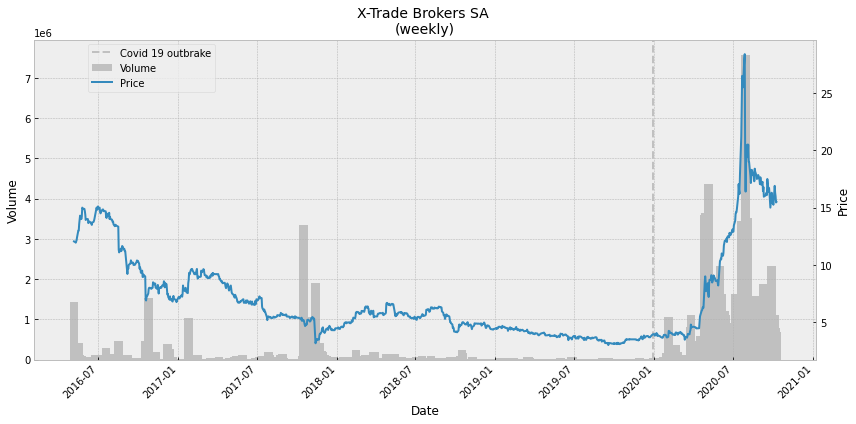

In [4]:
# Plotting the closing price and volume, weekly view
price = xtb.Zamkniecie.resample("W").mean()
volume = xtb.Wolumen.resample("W").sum()

fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate(rotation=45)

ax.bar(volume.index, volume, color="silver", width=20)
ax.set(xlabel="Date", ylabel="Volume", yscale="linear")
ax.set_title(label="X-Trade Brokers SA \n(weekly)", fontsize=14)
ax.axvline("2019-12-30", color="silver", linestyle="--", linewidth=2)

ax2 = ax.twinx()
ax2.plot(price.index, price, linewidth=2)
ax2.set(ylabel="Price", yscale="linear")

fig.legend(["Covid 19 outbrake", "Volume", "Price"], loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.grid()
plt.tight_layout()
plt.show()

In [96]:
# constructing dataset
dataset = pd.concat([xtb["Zamkniecie"], 
                     wig["Zamkniecie"], 
                     spx["Zamkniecie"], 
                     gld["Zamkniecie"], 
                     oil["Zamkniecie"], 
                     usd["Zamkniecie"], 
                     vix["Zamkniecie"]], axis=1).dropna()

dataset.columns = ["xtb", "wig", "spx", "gld", "oil", "usd", "vix"]
dataset.head()

,xtb,wig,spx,gld,oil,usd,vix
Data,,,,,,,
2019-12-09,3.84000,55867.95,3135.96,1464.9,59.02,0.90372,19.125
2019-12-10,3.63000,55609.32,3132.52,1468.1,59.24,0.90144,19.450
2019-12-11,3.65003,55531.27,3141.63,1475.0,58.76,0.89821,19.475
2019-12-12,3.69000,56621.06,3168.57,1472.3,59.18,0.89415,19.125
2019-12-13,3.75000,56729.11,3168.80,1481.2,60.07,0.89954,18.975


In [61]:
# Correlation between variables
cor = dataset.corr()
cor

,xtb,wig,spx,gld,oil,usd,vix
xtb,1.000000,-0.016087,0.471730,0.896834,-0.085995,-0.818061,0.641799
wig,-0.016087,1.000000,0.789923,-0.141207,0.907613,-0.172765,-0.682630
spx,0.471730,0.789923,1.000000,0.424692,0.676391,-0.632345,-0.203342
gld,0.896834,-0.141207,0.424692,1.000000,-0.242873,-0.795292,0.692664
oil,-0.085995,0.907613,0.676391,-0.242873,1.000000,-0.205353,-0.710591
usd,-0.818061,-0.172765,-0.632345,-0.795292,-0.205353,1.000000,-0.382385
vix,0.641799,-0.682630,-0.203342,0.692664,-0.710591,-0.382385,1.000000


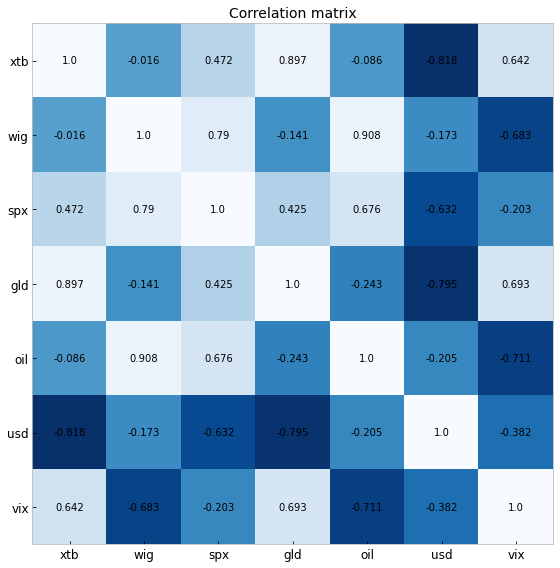

In [83]:
fig,ax =plt.subplots(figsize=(8,8))

ax.imshow(cor, cmap="Blues_r")
ax.set_title("Correlation matrix", fontsize=14)
ax.set_xticks(np.arange(len(cor.columns)))
ax.set_xticklabels(cor.columns, fontsize=12)
ax.set_yticks(np.arange(len(cor.index.values)))
ax.set_yticklabels(cor.index.values, fontsize=12)

for i in range(len(cor.index.values)):
    for c in range(len(cor.columns.values)):
        text = ax.text(i, c, cor.iloc[i,c].round(3), ha="center", va="center", color="black")

plt.grid(False)
plt.tight_layout()
plt.show()

In [84]:
# Chosing features and labels
labels = dataset["xtb"].values
features = dataset.drop("xtb", axis=1).values

In [85]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [86]:
# Aplying Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [87]:
# Measuring LR results

print("MSE: %.4f" % mean_squared_error(y_test, predictions))
print("RMSE: %.4f" % (np.sqrt(mean_squared_error(y_test, predictions))))
print('R2: %.4f' % r2_score(y_test, predictions))

MSE: 5.1621
RMSE: 2.2720
R2: 0.8701


In [88]:
# Measuring DTR results
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)

In [89]:
# Measuring DTR results
print("MSE: %.4f" % mean_squared_error(y_test, predictions))
print("RMSE: %.4f" % (np.sqrt(mean_squared_error(y_test, predictions))))
print('R2: %.4f' % r2_score(y_test, predictions))

MSE: 1.3258
RMSE: 1.1514
R2: 0.9666


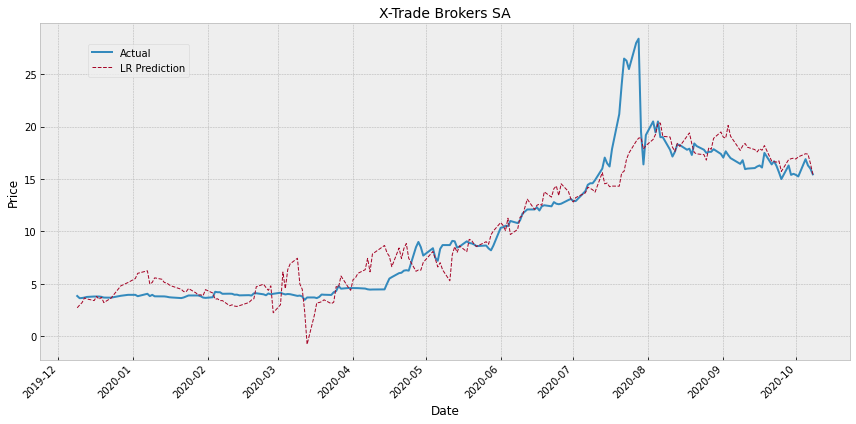

In [94]:
# Plotting LR results
fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate(rotation=45)

ax.set(xlabel="Date", ylabel="Price", yscale="linear")
ax.set_title(label="X-Trade Brokers SA", fontsize=14)

ax.plot(dataset.index, dataset.xtb, linewidth=2)
ax.plot(dataset.index, pd.Series(lr.predict(dataset.drop("xtb",axis=1).values)), linewidth=1, ls="--")

fig.legend(["Actual", "LR Prediction", "DTR Prediction"], loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

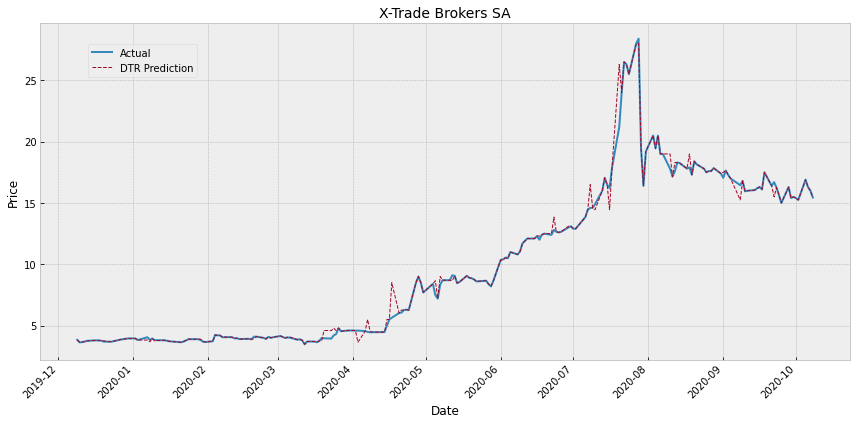

In [95]:
# Plotting DTR results
fig, ax = plt.subplots(figsize=(12,6))
fig.autofmt_xdate(rotation=45)

ax.set(xlabel="Date", ylabel="Price", yscale="linear")
ax.set_title(label="X-Trade Brokers SA", fontsize=14)

ax.plot(dataset.index, dataset.xtb, linewidth=2)
ax.plot(dataset.index, pd.Series(dtr.predict(dataset.drop("xtb",axis=1).values)), linewidth=1, ls="--")

fig.legend(["Actual", "DTR Prediction"], loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()